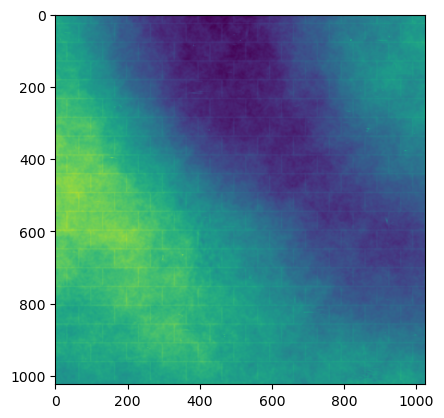

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
pic = Image.open("../data/loggingtest1/testsynth.tiff")
picnp = np.array(pic)
plt.imshow(picnp)

In [2]:
picnp.min()

7.285002

In [3]:
# pic = Image.open(test+testimage)
dim = 256
pic1 = pic.copy()
pic2 = pic.copy()
pic3 = pic.copy()
pic4 = pic.copy()
# dim = 512
w = pic.size[0]
nx = int(w/dim)
h = pic.size[1]
ny = int(h/dim)
i = 0

picpastenp1 = np.zeros((w,h))
picpaste1 = Image.new(mode = 'F',size=(w,h)) 
picpaste2 = Image.new(mode = 'F',size=(w,h))
picpaste3 = Image.new(mode = 'F',size=(w,h))
co_ords = np.zeros((2, nx*ny))


size = 256

if nx == w/dim:
    nxend = nx
else:
    nxend = nx+1
    
if ny == h/dim:
    nyend = ny
else:
    nyend = ny+1

for x in range(0, nxend):
    print(x)
    for y in range(0,nyend):
      print(y)
      left = int(x*dim)
      bottom = int(y*dim)
      right =int(dim*(1+x))
      top =int(dim*(1+y))
      box = (left,bottom,right,top)
      region = pic.crop(box)

    
      if left< 0:

        overlapleft = 0 - left
        end = max(dim,(2*overlapleft))
        copy = region.crop((overlapleft,0,end, dim))
        width = copy.size[0]
        mirrored = copy.transpose(0)
        noverlap = int(overlapleft/width)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(end-width*(a+1),0,end-width*a,dim) )


      if right> w:


        overlapright = right - w
        start = max(0,dim-(2*overlapright))
        copy = region.crop((start,0,(dim-overlapright), dim))
        width = copy.size[0]
        mirrored = copy.transpose(0)
        noverlap = int(overlapright/width)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(start+width*a,0,start+width*(1+a),dim) )



      if bottom< 0:

        overlapbottom = 0 - bottom
        end = max(dim,(2*overlapbottom))
        copy = region.crop((0,overlapbottom,dim,end))
        height = copy.size[1]
        mirrored = copy.transpose(1)
        noverlap = int(overlapbottom/height)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(0,end-height*(a+1),dim,end-height*a) )

      if top> h:


        overlaptop = top - h
        start = max(0,dim-(2*overlaptop))
        copy = region.crop((0,start,dim,(dim-overlaptop)))
        height = copy.size[1]
        mirrored = copy.transpose(1)
        noverlap = int(overlaptop/height)
        for a in range(1, noverlap+1):
            region.paste(mirrored,(0,start+height*a,dim,start+height*(1+a)) )


0
0
1
2
3
1
0
1
2
3
2
0
1
2
3
3
0
1
2
3


In [4]:
height

NameError: name 'height' is not defined

In [ ]:
overlaptop

In [ ]:
top

In [ ]:
h